In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zaraks/pascal-voc-2007")

print("Path to dataset files:", path)

100%|██████████| 1.65G/1.65G [01:52<00:00, 15.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zaraks/pascal-voc-2007/versions/1


In [6]:
cat_img = '/root/DeepLabv3+/test_data/cat.jpeg'

In [8]:
test_img = '/root/.cache/kagglehub/datasets/dansbecker/cityscapes-image-pairs/versions/1/cityscapes_data/val/1.jpg'

In [7]:
from run_demo import run

run(
  input=cat_img,
  dataset='voc',
  model='deeplabv3plus_resnet50',
  output_stride=16,
  ckpt='/root/autodl-fs/pretrain_DeepLabV3+/best_deeplabv3plus_resnet50_voc_os16.pth',
  save_val_results_to='./output/voc',
  crop_val=True,
  crop_size=513
)

Device: cuda
Resume model from /root/autodl-fs/pretrain_DeepLabV3+/best_deeplabv3plus_resnet50_voc_os16.pth


100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


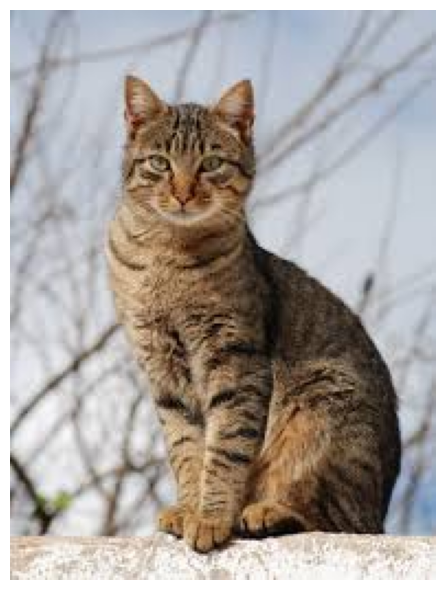

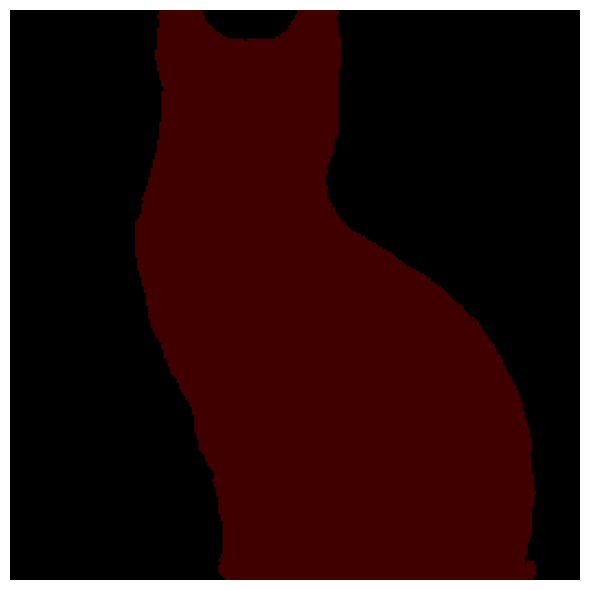

In [10]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

input_path = cat_img
pred_path  = 'output/voc/cat.png'

inp  = Image.open(input_path).convert('RGB')
pred = Image.open(pred_path).convert('RGB')

target_h = inp.height
new_w = int(pred.width * target_h / pred.height)
pred_resized = pred.resize((new_w, target_h), Image.NEAREST)

inp_np  = np.array(inp)
pred_np = np.array(pred_resized)

plt.figure(figsize=(6, 6))
plt.imshow(inp_np)
# plt.title("Input")
plt.axis("off")
plt.tight_layout()
plt.savefig('image/ppt/Input_voc_cat.jpg', dpi=300)
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(pred_np)
# plt.title("DeepLabV3+ Prediction")
plt.axis("off")
plt.tight_layout()
plt.savefig('image/ppt/Pred_voc_cat.jpg', dpi=300)
plt.show()

In [13]:
import os
from PIL import Image

def crop_left_half_image(input_path: str, output_path: str = None) -> Image.Image:
    img = Image.open(input_path).convert("RGB")
    w, h = img.size
    
    left_img = img.crop((0, 0, w // 2, h))
    
    if output_path:
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        left_img.save(output_path)
    
    return left_img

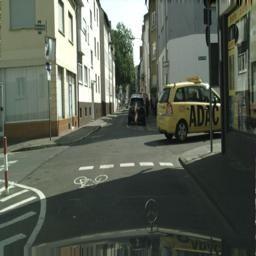

In [14]:
left = crop_left_half_image(test_img, '/root/DeepLabv3+/test_data/left_half.png')
display(left)

In [16]:
from run_demo import run

run(
  input='/root/DeepLabv3+/test_data/left_half.png',
  dataset='voc',
  model='deeplabv3plus_resnet50',
  output_stride=16,
  ckpt='/root/autodl-fs/pretrain_DeepLabV3+/best_deeplabv3plus_resnet50_voc_os16.pth',
  save_val_results_to='./output/voc',
  crop_val=True,
  crop_size=513
)

Device: cuda
Resume model from /root/autodl-fs/pretrain_DeepLabV3+/best_deeplabv3plus_resnet50_voc_os16.pth


100%|██████████| 1/1 [00:00<00:00, 23.39it/s]


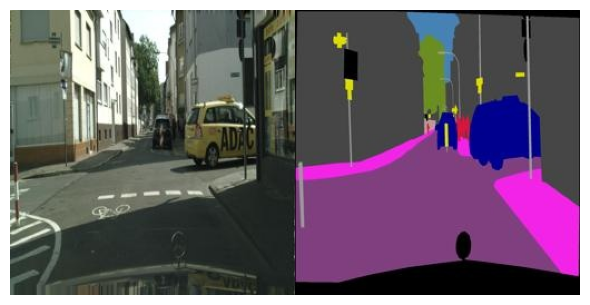

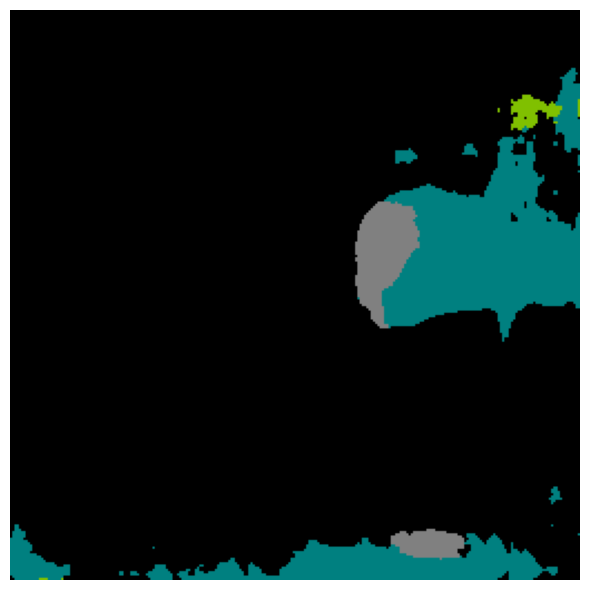

In [18]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

input_path = test_img
pred_path  = 'output/voc/left_half.png'

inp  = Image.open(input_path).convert('RGB')
pred = Image.open(pred_path).convert('RGB')

target_h = inp.height
new_w = int(pred.width * target_h / pred.height)
pred_resized = pred.resize((new_w, target_h), Image.NEAREST)

inp_np  = np.array(inp)
pred_np = np.array(pred_resized)

plt.figure(figsize=(6, 6))
plt.imshow(inp_np)
# plt.title("Input")
plt.axis("off")
plt.tight_layout()
plt.savefig('image/ppt/Input_voc_city.jpg', dpi=300)
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(pred_np)
# plt.title("DeepLabV3+ Prediction")
plt.axis("off")
plt.tight_layout()
plt.savefig('image/ppt/Pred_voc_city.jpg', dpi=300)
plt.show()